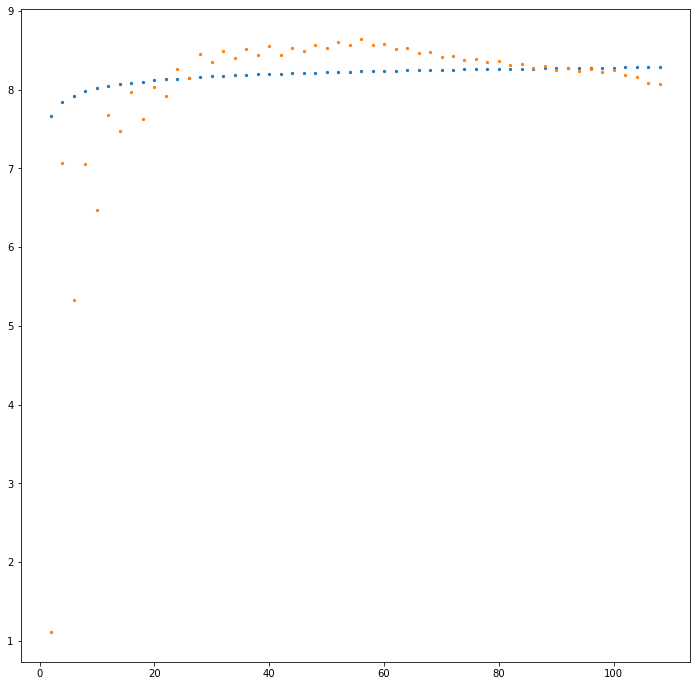

[8.5, -1.1] 8.943
Done
Time taken:  9.829848792011035


In [4]:
#2D Chi-Squared Surface Thing

import numpy as np
import matplotlib.pyplot as plt
import time
import math

start = time.perf_counter()

measuredNuclearData = np.loadtxt("ZNBE.dat")

for i in measuredNuclearData:
    
    i[2] = i[2] * (i[0] + i[1]) 
    
#This makes measuredNuclearData elements be: [Z, N, BE] instead of BE/A

samples = 95

chiSqSurfaceData = [0, 0, float('inf'), []]

AvField = np.linspace(0,50, samples)
AsField = np.linspace(-50, 0, samples)

for Av in AvField:
    for As in AsField:
        chiSq = 0
        SEMFData = []
        for i in measuredNuclearData:

            if i[0]!=i[1] or i[0] < 8:
                continue
            
            Z = i[0]
            N = i[1]
            A = N + Z
                
            vol = Av * A
            sur = As * A**(2/3)
            
            BE = vol + sur
            
            SEMFData.append([round(A, 1), BE])
            chiSq += (BE - i[2])**2
                        
        if chiSq < chiSqSurfaceData[2]:
            chiSqSurfaceData = [round(Av, 1), round(As, 1), round(chiSq, 1), SEMFData]                
        

SEMFData = chiSqSurfaceData[3]

plt.figure(figsize=(12,12))

A = [i[0] for i in SEMFData]
BE = [i[1]/i[0] for i in SEMFData]

plt.scatter(A, BE, s=5)
realData = [([i[0]+i[1],i[2]]) for i in measuredNuclearData if ((i[0]==i[1]) and i[0] >= 8)]

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSqSurfaceData[0:2], round(math.log(chiSqSurfaceData[2]), 3))

print("Done")
stop = time.perf_counter()
print("Time taken: ", stop - start)

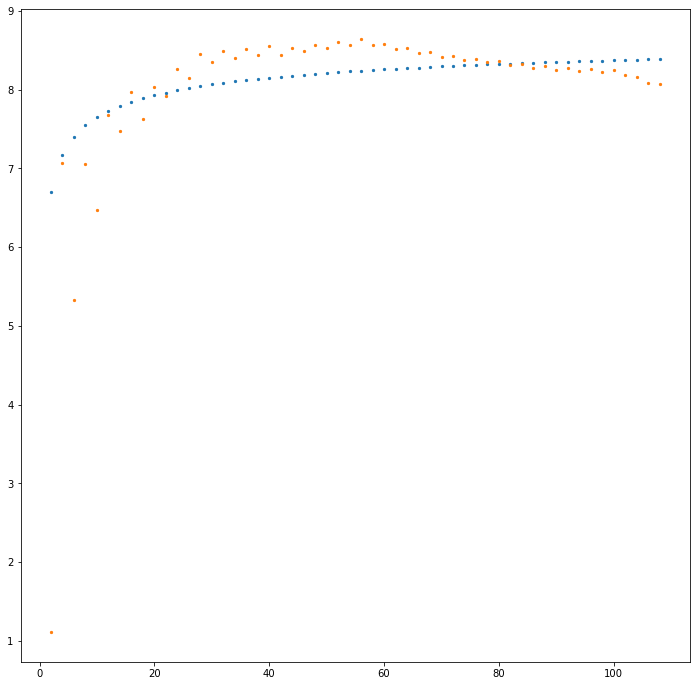

[9.0, -2.9, 9.175]
Done
Time taken:  9.54177358400193


In [5]:
start = time.perf_counter()

AvField = np.linspace(0, 50, 501)
AsField = np.linspace(-50, 0, 501)

number_of_points = 1000 # ~14 seconds per 10,000

bestSEMF = []
bestChiSq = float('inf')
chiSqSurfaceData = []

for i in range(number_of_points):
    
    chiSq = 0
    SEMFData = []
    
    Av = round(AvField[np.random.randint(0, 501)], 1)
    As = round(AsField[np.random.randint(0, 501)], 1)
    
    for i in measuredNuclearData:
        
        if i[0]!=i[1] or i[0] < 8:
            continue
        
        Z = i[0]
        N = i[1]
        A = N + Z

        vol = Av * A
        sur = As * A**(2/3)

        BE = vol + sur

        SEMFData.append([A, BE])
        chiSq += (BE - i[2])**2
    
    chiSqSurfaceData.append([Av, As, round(chiSq, 1)])
    
    if chiSq < bestChiSq:
        bestSEMF = SEMFData
        bestChiSq = chiSq

maxChi = max([i[2] for i in chiSqSurfaceData])

chiSqSurfaceData = [[i[0], i[1], round(math.log(i[2]), 3)] for i in chiSqSurfaceData]

np.savetxt('2DchiSqSurfaceTrainingDataRestricted.dat', chiSqSurfaceData)

chi = [chiSqSurfaceData[i][2] for i in range(len(chiSqSurfaceData))]
minChi = min(chi)
minIndex = chi.index(minChi)

realData = [([i[0]+i[1],i[2]]) for i in measuredNuclearData if (i[0]==i[1])]

plt.figure(figsize=(12,12))

A = [i[0] for i in bestSEMF]
BE = [i[1]/i[0] for i in bestSEMF]

plt.scatter(A, BE, s=5)

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSqSurfaceData[minIndex][0:3])

print("Done")
stop = time.perf_counter()
print("Time taken: ", stop - start)